In [1]:
import stemtool as st
import cv2
import skimage
import numpy as np
from skimage import io
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

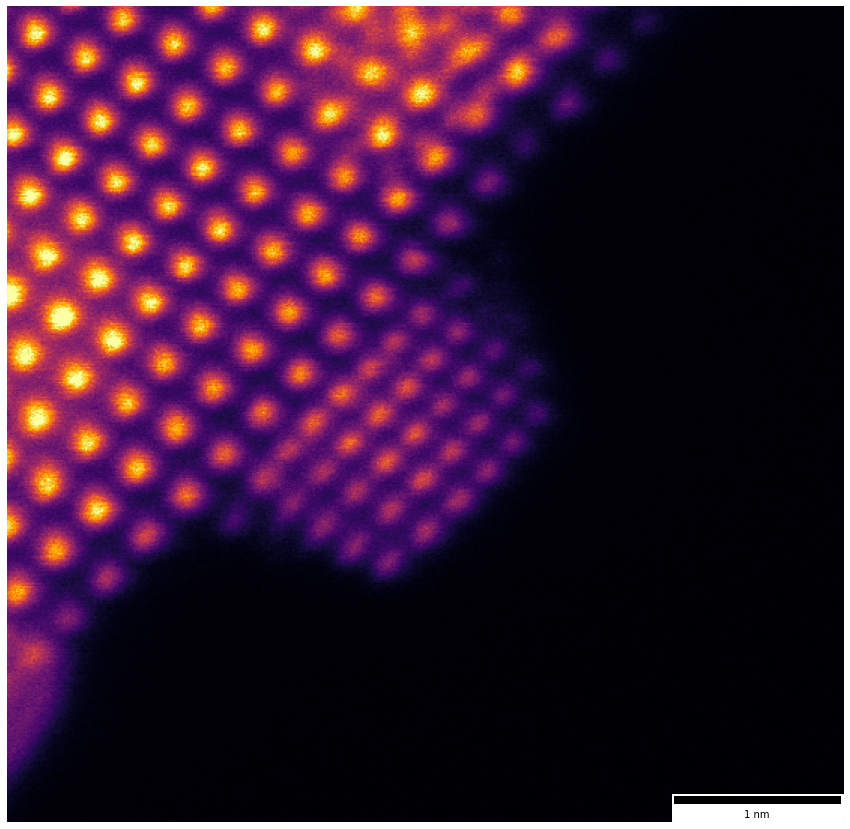

In [2]:
im = skimage.io.imread("test.tif")
atoms = st.afit.atom_fit(im,0.009, 'nm')
atoms.show_image()

In [3]:
#img = img_as_float(data.coins())
image_max = ndi.maximum_filter(im, size=5, mode='constant')
coordinates = peak_local_max(im, min_distance=10)
threshold = 15

for coordinate in coordinates:
    if im[coordinate[0],coordinate[1]] < threshold:
        coordinates = np.delete(coordinates, np.where(np.all(coordinates==coordinate,axis=1)), axis=0)

        

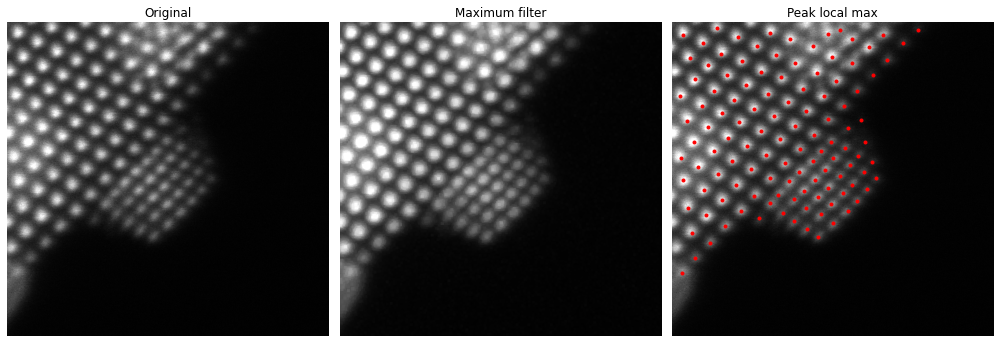

In [4]:
# display results
fig, axes = plt.subplots(1, 3, figsize=(14, 6), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(im, cmap=plt.cm.gray)
ax[2].autoscale(False)
ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[2].axis('off')
ax[2].set_title('Peak local max')

fig.tight_layout()

plt.show()

C:\Users\elih\Anaconda3\lib\site-packages\stemtool\afit\atom_positions.py:1091: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  data_peaks = skfeat.peak_local_max(


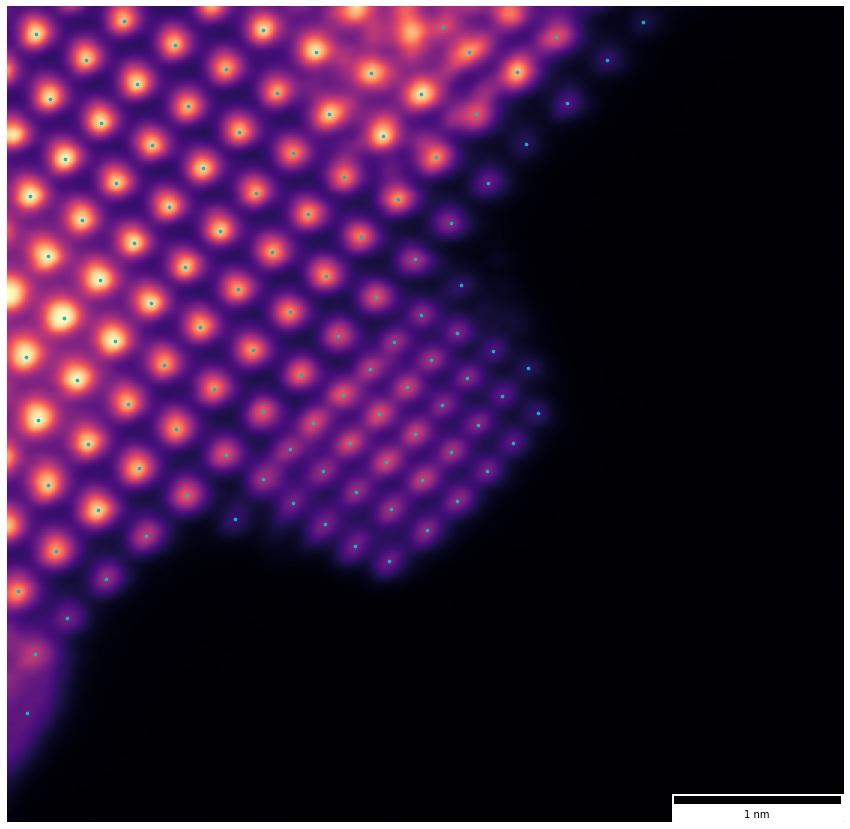

In [5]:
#atoms.define_reference((150,400), (400,400), (400,150), (150,150))
atoms.peaks_vis(dist=0.2, thresh=0.1)

In [6]:
atoms.refine_peaks()

C:\Users\elih\Anaconda3\lib\site-packages\stemtool\afit\atom_positions.py:834: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "med_dist_numba" failed type inference due to: Unknown attribute 'filterwarnings' of type Module(<module 'warnings' from 'C:\\Users\\elih\\Anaconda3\\lib\\warnings.py'>)

File "..\..\Anaconda3\lib\site-packages\stemtool\afit\atom_positions.py", line 836:
def med_dist_numba(positions):
    warnings.filterwarnings("ignore")
    ^

During: typing of get attribute at C:\Users\elih\Anaconda3\lib\site-packages\stemtool\afit\atom_positions.py (836)

File "..\..\Anaconda3\lib\site-packages\stemtool\afit\atom_positions.py", line 836:
def med_dist_numba(positions):
    warnings.filterwarnings("ignore")
    ^

  @numba.jit(parallel=True)
C:\Users\elih\Anaconda3\lib\site-packages\stemtool\afit\atom_positions.py:834: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "med

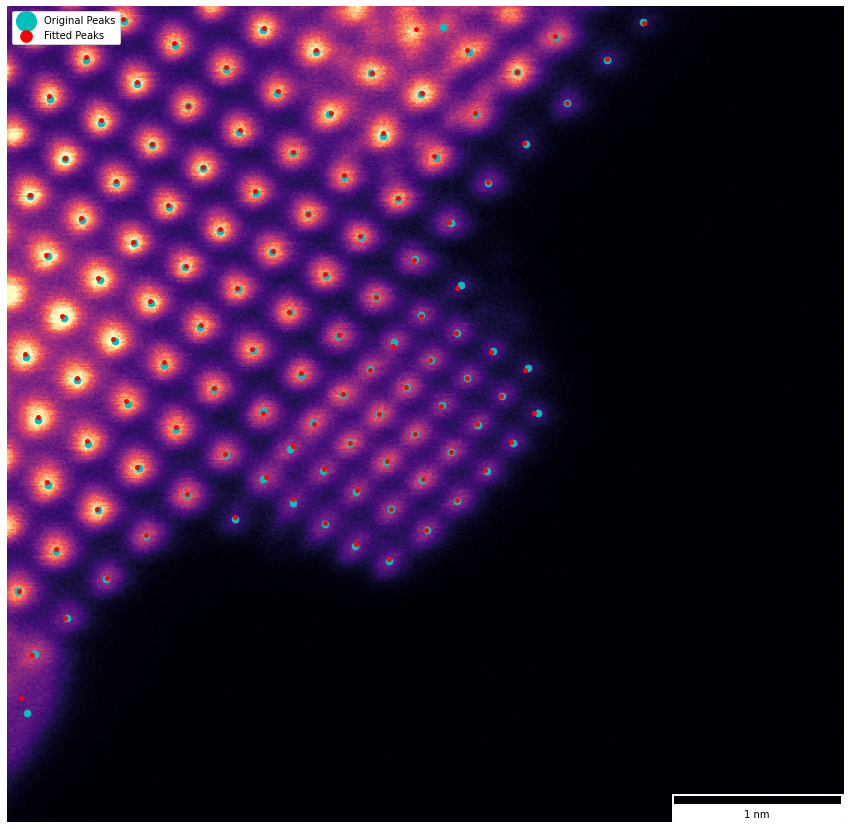

In [7]:
atoms.show_peaks(style = 'together')

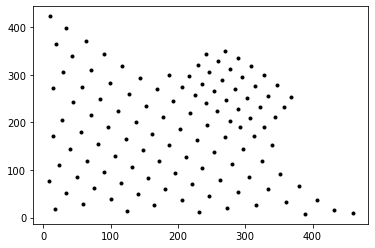

In [8]:
x = atoms.refined_peaks[:,1]
y = atoms.refined_peaks[:,0]
Fitted_coordinates = np.column_stack((x,y))
#print(Fitted_coordinates)
plt.plot(Fitted_coordinates[:, 1], Fitted_coordinates[:, 0], 'k.')

In [ ]:
for coords in Fitted_coordinates:
    c = sqrt(a^2+b^2)

In [9]:
[print(i) for i in dir(cv2) if 'EVENT' in i]

EVENT_FLAG_ALTKEY
EVENT_FLAG_CTRLKEY
EVENT_FLAG_LBUTTON
EVENT_FLAG_MBUTTON
EVENT_FLAG_RBUTTON
EVENT_FLAG_SHIFTKEY
EVENT_LBUTTONDBLCLK
EVENT_LBUTTONDOWN
EVENT_LBUTTONUP
EVENT_MBUTTONDBLCLK
EVENT_MBUTTONDOWN
EVENT_MBUTTONUP
EVENT_MOUSEHWHEEL
EVENT_MOUSEMOVE
EVENT_MOUSEWHEEL
EVENT_RBUTTONDBLCLK
EVENT_RBUTTONDOWN
EVENT_RBUTTONUP


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [11]:
# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):
 
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
 
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img)
 
    # checking for right mouse clicks    
    if event==cv2.EVENT_RBUTTONDOWN:
 
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
 
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r),
                    (x,y), font, 1,
                    (255, 255, 0), 2)
        cv2.imshow('image', img)
 
# driver function
img = cv2.imread('lena.jpg', 1)

cv2.imshow('image', img)
 
    # setting mouse handler for the image
    # and calling the click_event() function
cv2.setMouseCallback('image', click_event)
 
    # wait for a key to be pressed to exit
cv2.waitKey(0)
 
    # close the window
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'
